In [82]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

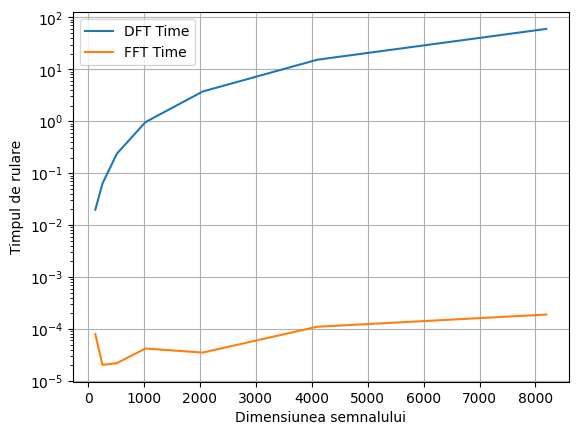

In [83]:
# Exercitiul 1
def dft(x: np.ndarray):
    n = x.shape[0]
    X = np.zeros(n, dtype=np.complex128)
    for m in range(n):
        for i in range(n):
            X[m] += x[i] * np.e ** (-2j * np.pi * m * i / n)
    
    return X

N = np.array([128, 256, 512, 1024, 2048, 4096, 8192])
dft_times = []
fft_times = []
for n in N:
    t = np.linspace(0, 1, n)
    x = np.sin(2 * np.pi * 5 * t)

    start_dft = time.time()
    _ = np.abs(dft(x))
    end_dft = time.time()
    dft_times.append(end_dft - start_dft)

    start_fft = time.time()
    _ = np.abs(np.fft.fft(x))
    end_fft = time.time()
    fft_times.append(end_fft - start_fft)

plt.plot(N, np.array(dft_times), label='DFT Time')
plt.plot(N, np.array(fft_times), label='FFT Time')
plt.xlabel('Dimensiunea semnalului')
plt.ylabel('Timpul de rulare')
plt.yscale('log')
plt.legend()
plt.grid()

if not os.path.exists('exercitiul1'):
    os.mkdir('exercitiul1')

plt.savefig(os.path.join('exercitiul1', f"exercitiul1.png"))
plt.savefig(os.path.join('exercitiul1', f"exercitiul1.pdf"))
plt.show() 

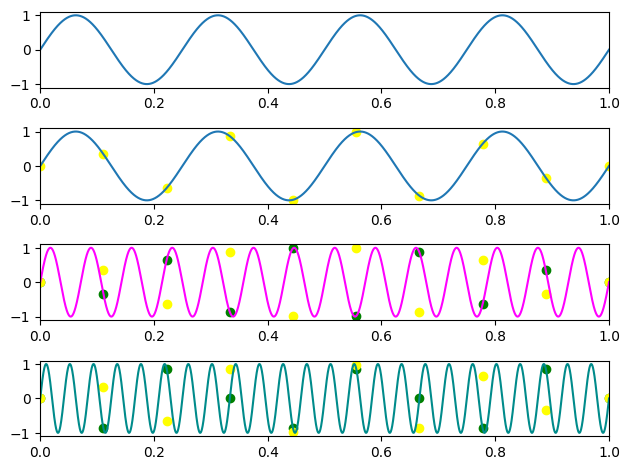

In [84]:
# Exercitiul 2
def signal(n: np.ndarray, f: float):
    return np.sin(2 * np.pi * f * n)

f = 4
fs = 10
n = np.linspace(0, 1, 10000)
time = np.linspace(0, 1, fs)

fig, axs = plt.subplots(4)
axs[0].plot(n, signal(n, f))
axs[0].set_xlim([0, 1])

axs[1].plot(n, signal(n, f))
axs[1].scatter(time, signal(time, f), c='yellow')
axs[1].set_xlim([0, 1])

axs[2].plot(n, signal(n, f + fs), c='magenta')
axs[2].scatter(time, signal(time, f + fs), c='green')
axs[2].scatter(time, signal(time, f), c='yellow')
axs[2].set_xlim([0, 1])

axs[3].plot(n, signal(n, f + 2*fs), c='darkcyan')
axs[3].scatter(time, signal(time, f + 2*fs), c='green')
axs[3].scatter(time, signal(time, f), c='yellow')
axs[3].set_xlim([0, 1])

plt.tight_layout()

if not os.path.exists('exercitiul2'):
    os.mkdir('exercitiul2')

plt.savefig(os.path.join('exercitiul2', f"exercitiul2.png"))
plt.savefig(os.path.join('exercitiul2', f"exercitiul2.pdf"))

plt.show()
plt.close(fig)

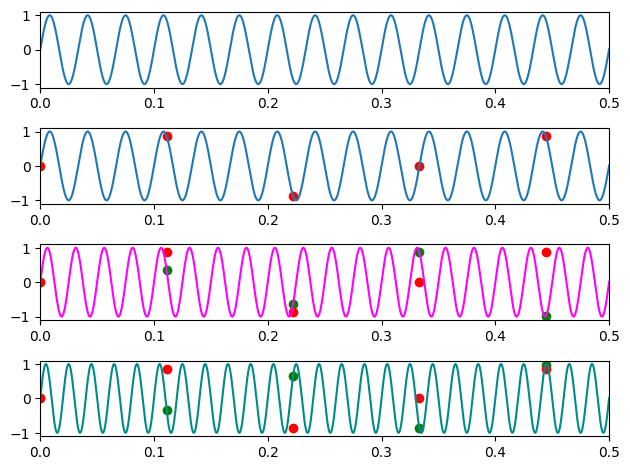

In [85]:
# Exercitiul 3
def signal(n: np.ndarray, f: float):
    return np.sin(2 * np.pi * f * n)

f = 30
fs = 10
n = np.linspace(0, 1, 10000)
time = np.linspace(0, 1, fs)

fig, axs = plt.subplots(4)
axs[0].plot(n, signal(n, f))
axs[0].set_xlim([0, 0.5])

axs[1].plot(n, signal(n, f))
axs[1].scatter(time, signal(time, f), c='red')
axs[1].set_xlim([0, 0.5])

axs[2].plot(n, signal(n, f + fs), c='magenta')
axs[2].scatter(time, signal(time, f + fs), c='green')
axs[2].scatter(time, signal(time, f), c='red')
axs[2].set_xlim([0, 0.5])

axs[3].plot(n, signal(n, f + 2 * fs), c='darkcyan')
axs[3].scatter(time, signal(time, f + 2 * fs), c='green')
axs[3].scatter(time, signal(time, f), c='red')
axs[3].set_xlim([0, 0.5])

plt.tight_layout()

if not os.path.exists('exercitiul3'):
    os.mkdir('exercitiul3')

plt.savefig(os.path.join('exercitiul3', f"exercitiul3.png"))
plt.savefig(os.path.join('exercitiul3', f"exercitiul3.pdf"))

plt.show()
plt.close(fig)

## Exercitiul 4
Frecventele emise de un contrabas se incadreaza intre 40Hz si 200Hz. Care este frecventa minima cu care trebuie esantionat semnalul trece-banda din inregistrarea instrumentului, astfel incat semnalul discretizat sa contina toate componentele de frecventa pe care instrumentul le poate produce?

Rezolvare:
* Conform teoremei Nyquist-Shannon, pentru a evita pierderea informatiei in timpul procesului de esantionare, trebuie sa esantionam semnalul cu o rata de cel putin dublu fata de frecventa maxima a semnalului pe care dorim sa il reproducem.
    
* In cazul de fata frecventa maxima a unui contrabas este 200Hz, prin urmare trebuie sa esantionam semnalul cu o frecventa de cel putin 2 * 200Hz, adica 400Hz. Aceasta este frecventa de esantionare minima pentru a acoperi toate componentele de frecventa ale contrabasului.

# Exercitiul 5

![Vocale](exercitiul5/exercitiul5.png "Vocale")

* din spectograma doar **a** pare a fi mai diferit fata de celelalte vocale
* **e** si **i** au o forma asemanatoare
* **o** si **u** au o forma asemanatoare

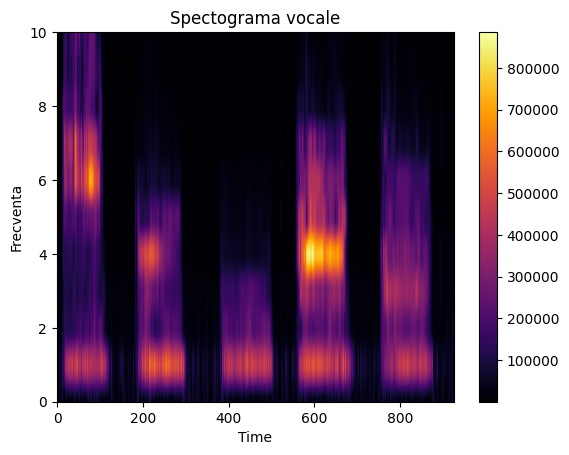

In [86]:
# Exercitiul 6
from scipy.io import wavfile

# Pct a
rate, signal = wavfile.read('exercitiul5/vocale.wav')

# Pct b + c
size = int(0.01 * rate)
overlap = size // 2

spectrogram = []
for i in range(0, len(signal) - size, overlap):
    group = signal[i : i + size]
    fft_rez = np.fft.fft(group)
    spectrogram.append(np.abs(fft_rez))
    
# Pct d
spectrogram = np.array(spectrogram).T

# Pct e
plt.figure()
plt.imshow(spectrogram, cmap='inferno', aspect='auto')
plt.xlabel('Time')

plt.ylabel('Frecventa')
plt.ylim((0, 10))
plt.title('Spectograma vocale')
plt.colorbar()

if not os.path.exists('exercitiul6'):
    os.mkdir('exercitiul6')

plt.savefig(os.path.join('exercitiul6', f"exercitiul6.png"))
plt.savefig(os.path.join('exercitiul6', f"exercitiul6.pdf"))

plt.show()

# Exercitiul 7

![Puterea_zgomotului](exercitiul7/exercitiul7.png "Puterea zgomotului")